# Feature exploration

Let's first load some useful python modules !

In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
from PIL import Image
from feature import *
from helper import *
import random as rd

We can load an image and print different extended images : grey image, gradient...

In [2]:
# Load a random iùage in the training set
root_dir = "training/"
image_dir = root_dir + "images/"
files = os.listdir(image_dir)
img = load_image(image_dir + files[rd.randint(0,50)])

### 1 - Grey image

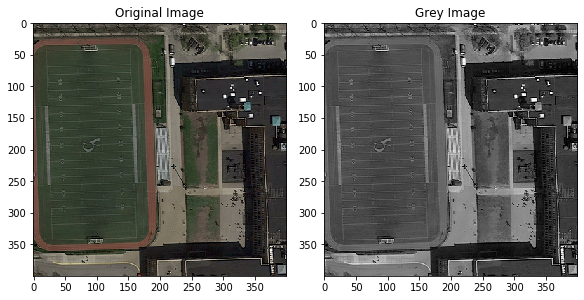

In [3]:
# Convert an image into grey shades
fig1,axs = plt.subplots(1,2,constrained_layout=True,figsize=(8,8))
axs[0].set_title('Original Image')
axs[0].imshow(img, cmap='Greys_r')

imgGrey=rgb_to_grey(img)
axs[1].set_title('Grey Image')
axs[1].imshow(imgGrey, cmap='Greys_r')
plt.show()

### 2 - Gradient image

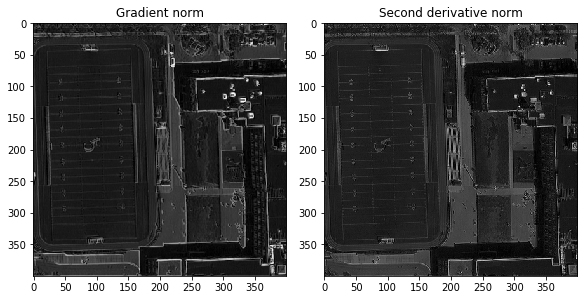

In [4]:
imgGrad=compute_gradientNorm(imgGrey)
fig1,axs = plt.subplots(1,2,constrained_layout=True,figsize=(8,8))
axs[0].set_title('Gradient norm')
axs[0].imshow(imgGrad, cmap='Greys_r')

imgGrad2=compute_second_derivativeNorm(imgGrey)
axs[1].set_title('Second derivative norm')
axs[1].imshow(imgGrad2, cmap='Greys_r')
plt.show()

### 3 - Features analysis

In this section we load all images and try to see which features (green projection, grey gradient...) are relevant for road segmentation.

In [5]:
#Load all images
n = min(200,len(files))
imgs = [load_image(image_dir + files[i]) for i in range(n)]

gt_dir = root_dir + "groundtruth/"
gt_imgs = [load_image(gt_dir + files[i]) for i in range(n)]

In [6]:
# Get patches
patch_size = 16 
img_patches = [img_crop(imgs[i], patch_size, patch_size) for i in range(n)]
gt_patches = [img_crop(gt_imgs[i], patch_size, patch_size) for i in range(n)]
# Linearize list of patches
img_patches = np.asarray([img_patches[i][j] for i in range(len(img_patches)) for j in range(len(img_patches[i]))])
gt_patches =  np.asarray([gt_patches[i][j] for i in range(len(gt_patches)) for j in range(len(gt_patches[i]))])

In [7]:
# Compute features for each image patch
foreground_threshold = 0.25 # percentage of pixels > 1 required to assign a foreground label to a patch

def value_to_class(v):
    df = np.sum(v)
    if df > foreground_threshold:
        return 1
    else:
        return 0

X = np.asarray([ extract_features_all_8d(img_patches[i]) for i in range(len(img_patches))])
Y = np.asarray([value_to_class(np.mean(gt_patches[i])) for i in range(len(gt_patches))])

# Print feature statistics

print(str(X.shape[0]) + ' features computed')
print('Feature dimension = ' + str(X.shape[1]))
print('Number of classes = ' + str(np.max(Y)))  #TODO: fix, length(unique(Y)) 

Y0 = [i for i, j in enumerate(Y) if j == 0]
Y1 = [i for i, j in enumerate(Y) if j == 1]
print('Non-road patches : ' + str(len(Y0)) + ' samples')
print('Road patches : ' + str(len(Y1)) + ' samples')

62500 features computed
Feature dimension = 8
Number of classes = 1
Non-road patches : 46309 samples
Road patches : 16191 samples


In [8]:
# Compute gradient and second derivative images
imgGreyFulls=np.asarray([rgb_to_grey(imgs[i]) for i in range(len(imgs))])
imgGradFulls=np.asarray([compute_gradientNorm(imgs[i]) for i in range(len(imgs))])
imgScondDerivFulls=np.asarray([compute_second_derivativeNorm(imgs[i]) for i in range(len(imgs))])

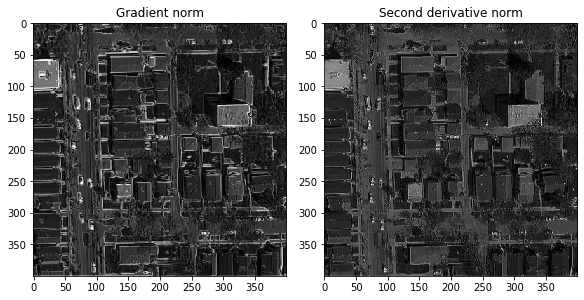

In [9]:
# Print gradient norm image and second derivative norm image for one particular image
fig1,axs = plt.subplots(1,2,constrained_layout=True,figsize=(8,8))
axs[0].set_title('Gradient norm')
axs[0].imshow(imgGradFulls[8], cmap='Greys_r')
axs[1].set_title('Second derivative norm')
axs[1].imshow(imgScondDerivFulls[8], cmap='Greys_r')
plt.show()

In [10]:
# Turn all images into patches lists
img_patches_greys = [img_crop(imgGreyFulls[i], patch_size, patch_size) for i in range(n)]
img_patches_grads = [img_crop(imgGradFulls[i], patch_size, patch_size) for i in range(n)]
img_patches_secderiv = [img_crop(imgScondDerivFulls[i], patch_size, patch_size) for i in range(n)]
img_patches_greys = np.asarray([img_patches_greys[i][j] for i in range(len(img_patches_greys)) for j in range(len(img_patches_greys[i]))])
img_patches_grads = np.asarray([img_patches_grads[i][j] for i in range(len(img_patches_grads)) for j in range(len(img_patches_grads[i]))])
img_patches_secderiv = np.asarray([img_patches_secderiv[i][j] for i in range(len(img_patches_secderiv)) for j in range(len(img_patches_secderiv[i]))])
img_patches_greys = np.asarray([ np.mean(img_patches_greys[i]) for i in range(len(img_patches_greys))])
img_patches_grads = np.asarray([ np.mean(img_patches_grads[i]) for i in range(len(img_patches_grads))])
img_patches_secderiv = np.asarray([ np.mean(img_patches_secderiv[i]) for i in range(len(img_patches_secderiv))])

Now we have our lists of patches, we're ready to visualize relevance of each feature for road segmentation.

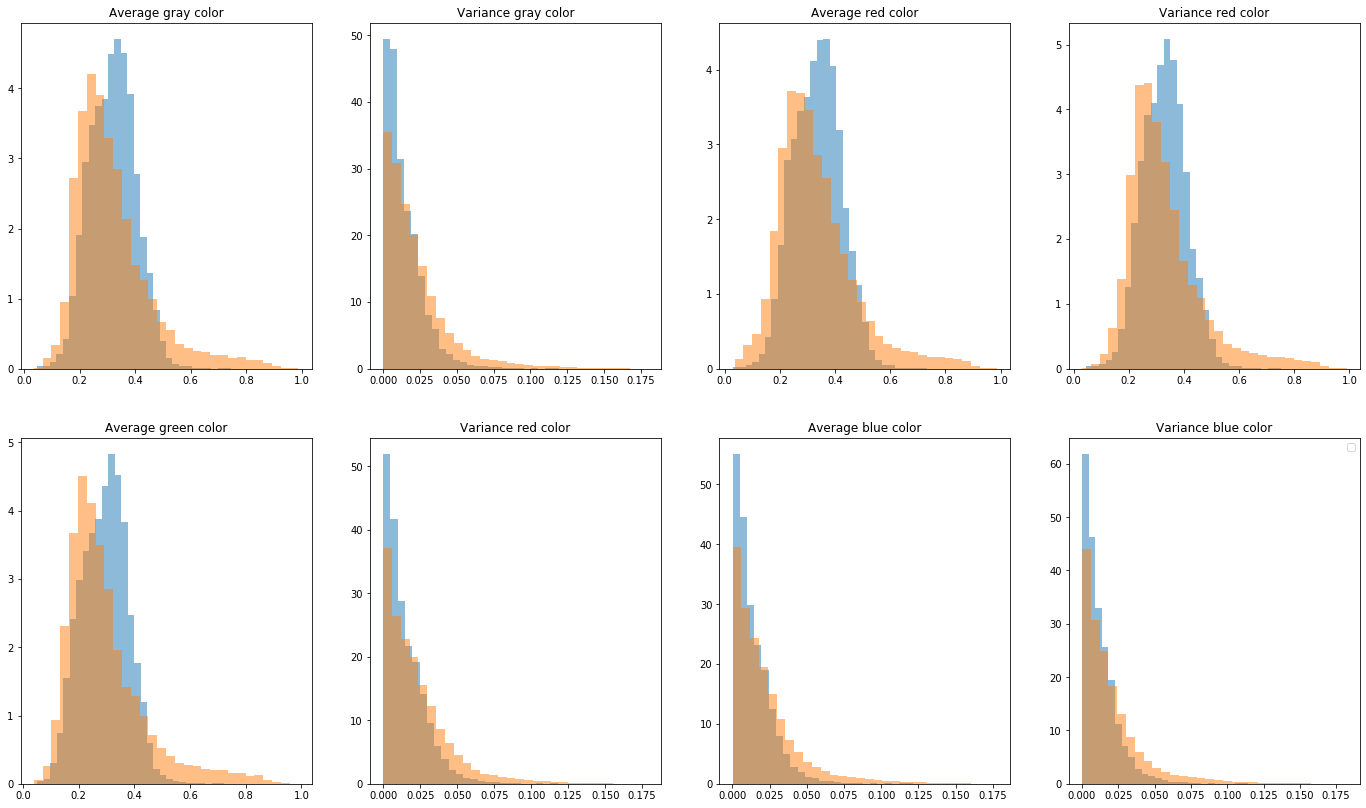

In [16]:
fig = plt.figure(1, figsize = (24,14))
ax = fig.subplots(2,4)
titles=['Average gray color','Variance gray color','Average red color','Variance red color','Average green color','Variance red color','Average blue color','Variance blue color']
for i in range(4):
    ax[0,i].hist(X[Y == 1,i], bins = 30, alpha=0.5, density = True)
    ax[0,i].hist(X[Y == 0,i], bins = 30, alpha=0.5, density = True)
    ax[0,i].set_title(titles[i])
    plt.legend(["a","b"])
for i in range(4):
    ax[1,i].hist(X[Y == 1,i+4], bins = 30, alpha=0.5, density = True)
    ax[1,i].hist(X[Y == 0,i+4], bins = 30, alpha=0.5, density = True)
    ax[1,i].set_title(i+4)
    ax[1,i].set_title(titles[i+4])
#plt.savefig("Avg_and_var")

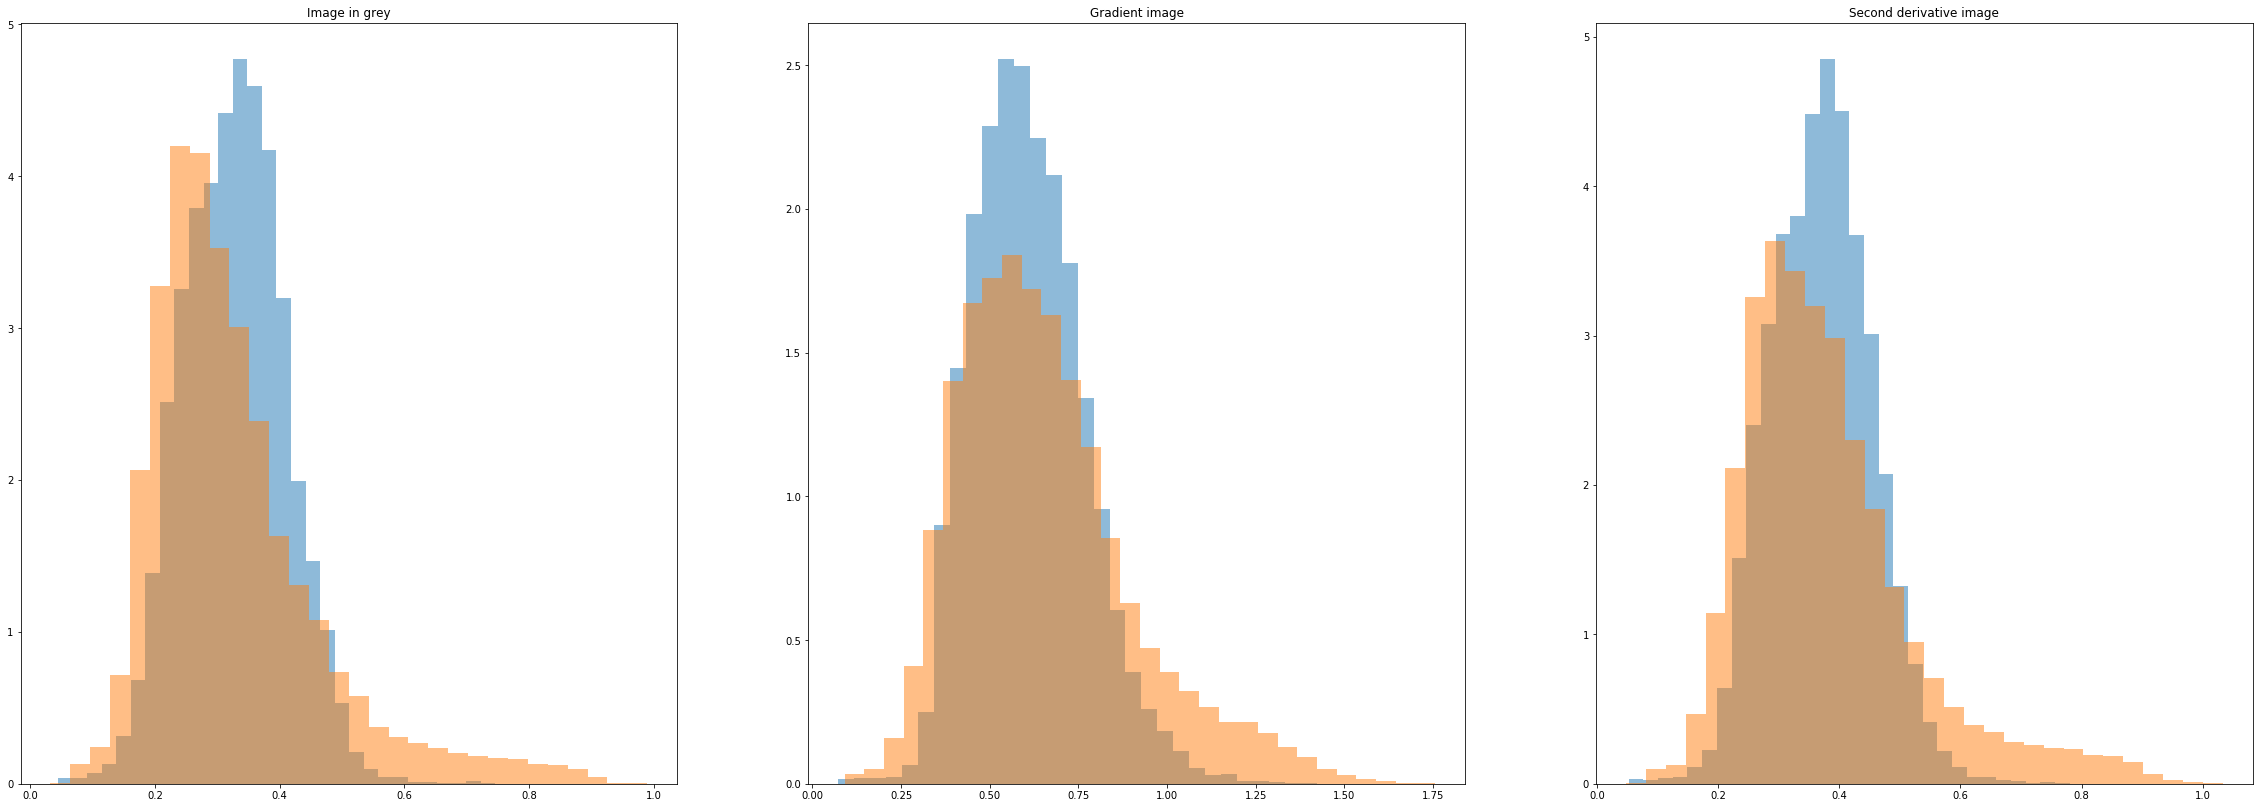

In [15]:
titles=['Image in grey','Gradient image','Second derivative image']
figbis = plt.figure(1, figsize = (40,14))
axbis = figbis.subplots(1,3)
axbis[0].hist(img_patches_greys[Y == 1], bins = 30, alpha=0.5, density = True)
axbis[0].hist(img_patches_greys[Y == 0], bins = 30, alpha=0.5, density = True)
axbis[0].set_title(titles[0])
axbis[1].hist(img_patches_grads[Y == 1], bins = 30, alpha=0.5, density = True)
axbis[1].hist(img_patches_grads[Y == 0], bins = 30, alpha=0.5, density = True)
axbis[1].set_title(titles[1])
axbis[2].hist(img_patches_secderiv[Y == 1], bins = 30, alpha=0.5, density = True)
axbis[2].hist(img_patches_secderiv[Y == 0], bins = 30, alpha=0.5, density = True)
axbis[2].set_title(titles[2])
#plt.savefig("grad_second")